<a href="https://colab.research.google.com/github/AilingLiu/Time-Series-Python/blob/main/2_Some_Simple_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests, zipfile, io

ufo = pd.read_csv('https://assets.datacamp.com/production/repositories/1120/datasets/c89d2158693af7d555a008198629d93aa059236e/UFO.csv')
temperature = pd.read_csv('https://assets.datacamp.com/production/repositories/1120/datasets/850e5614f8de4b134f40b4eeca27c7d0b91aeed2/NOAA_TAVG.csv')

r = requests.get('https://github.com/AilingLiu/Time-Series-Python/raw/main/data.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

# data files available
z.namelist()

['data/',
 'data/.DS_Store',
 '__MACOSX/',
 '__MACOSX/data/',
 '__MACOSX/data/._.DS_Store',
 'data/AMZN.csv',
 '__MACOSX/data/._AMZN.csv',
 'data/CME_HO1.csv',
 '__MACOSX/data/._CME_HO1.csv',
 'data/CME_NG1.csv',
 '__MACOSX/data/._CME_NG1.csv',
 'data/DJI.csv',
 '__MACOSX/data/._DJI.csv',
 'data/HRB.csv',
 '__MACOSX/data/._HRB.csv',
 'data/MSFT.csv',
 '__MACOSX/data/._MSFT.csv',
 'data/Sprint_Intraday.txt',
 '__MACOSX/data/._Sprint_Intraday.txt']

# compute autocorrelation


In [3]:
HRB=pd.read_csv('data/HRB.csv', sep=',', index_col='Quarter')
HRB.head()

,Earnings
Quarter,
2007Q1,-0.36
2007Q2,-0.38
2007Q3,0.07
2007Q4,1.85
2008Q1,-0.34


In [22]:
import numpy as np
q = pd.DataFrame(HRB.index.values, columns=['quarter'])['quarter'].str.split('Q').str[1]
t = q.map({'1':'01-01', '2':'04-01', '3':'07-01', '4':'10-01'})
HRB.index = pd.DataFrame(HRB.index.values, columns=['quarter'])['quarter'].str.split('Q').str[0].str.cat(t, sep='-')
HRB.index=pd.to_datetime(HRB.index)
HRB.head()

,Earnings
quarter,
2007-01-01,-0.36
2007-04-01,-0.38
2007-07-01,0.07
2007-10-01,1.85
2008-01-01,-0.34


In the last chapter, you computed autocorrelations with one lag. Often we are interested in seeing the autocorrelation over many lags. The quarterly earnings for H&R Block (ticker symbol HRB) is plotted on the right, and you can see the extreme cyclicality of its earnings. A vast majority of its earnings occurs in the quarter that taxes are due.

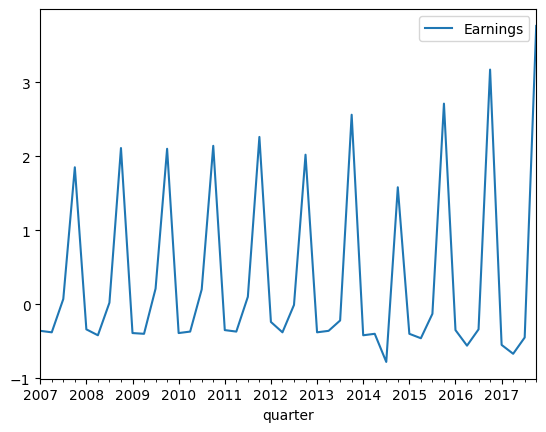

In [24]:
import matplotlib.pyplot as plt
ax = HRB.plot()
plt.show()

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259 ]


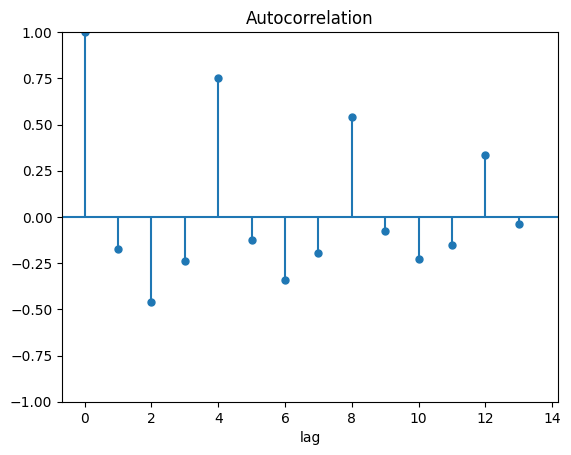

In [33]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
# suppress the confidence interval by setting alpha=1
fig, ax=plt.subplots()
plot_acf(acf_array, alpha=1, ax=ax) 
ax.set_xlabel('lag')
plt.show()

This plot shows what the autocorrelation function looks like for cyclical earnings data. Notice the strong positive autocorrelation at lags 4, 8, 12, 16, 20, ...

# Is the autocorrelation statistically significant?

In the last chapter, you saw that the autocorrelation of MSFT's weekly stock returns was -0.16. That autocorrelation seems large, but is it statistically significant? 

In other words, can you say that there is less than a **5% chance** that we would observe such a large negative autocorrelation if the true autocorrelation were really zero? And are there any autocorrelations at other lags that are significantly different from zero?

In [71]:
returns=pd.read_csv('data/MSFT.csv', sep=',', index_col='Date')
returns.index=pd.to_datetime(returns.index)
returns=returns.resample(rule='W').last().pct_change().round(3).dropna()
returns.head()

,Adj Close
Date,
2012-08-19,0.023
2012-08-26,-0.011
2012-09-02,0.009
2012-09-09,0.004
2012-09-16,0.008


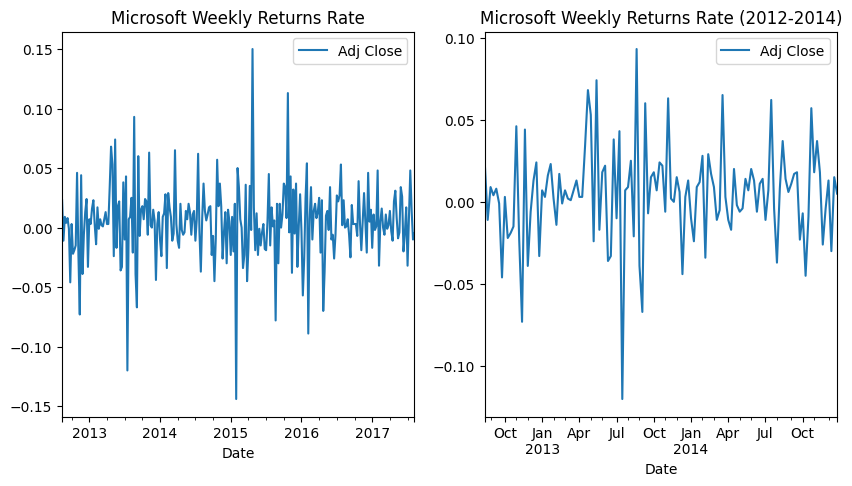

In [61]:
fig,(ax, ax1) = plt.subplots(1,2, figsize=(10, 5))

returns.plot(ax=ax)
ax.set_title('Microsoft Weekly Returns Rate')

returns['2012':'2014'].plot(ax=ax1)
ax1.set_title('Microsoft Weekly Returns Rate (2012-2014)')
plt.show()

The standard deviation of the sample autocorrelation is $1/\sqrt N$, where $N$ is the number of observations, so if $N = 100$
, for example, the standard deviation of the ACF is 0.1, and since 95% of a normal curve is between +1.96 and -1.96 standard deviations from the mean, the 95% confidence interval is $\pm1.96 * std$, therefore $\pm1.96/\sqrt N $
. This approximation only holds when the true autocorrelations are all zero.

In [54]:
# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96/nobs**0.5
print("The approximate confidence interval is +/- %4.2f" %(conf))

The autocorrelation of weekly MSFT returns is -0.16
The approximate confidence interval is +/- 0.12


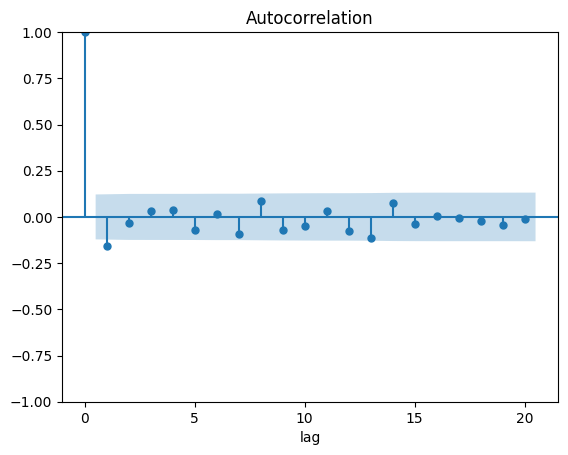

In [57]:
# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
fig, ax=plt.subplots()
plot_acf(returns, alpha=0.05, lags=20,ax=ax)
ax.set_xlabel('lag')
plt.show()

Notice that the autocorrelation with lag 1 is significantly negative, but none of the other lags are significantly different from zero.

In [62]:
acf(returns)

array([ 1.        , -0.15619599, -0.03430789,  0.03000675,  0.03748049,
       -0.07095548,  0.01674018, -0.09248905,  0.0873311 , -0.06859504,
       -0.05126717,  0.03446164, -0.07616942, -0.11156742,  0.07421815,
       -0.03859455,  0.00599774, -0.00358481, -0.02237751, -0.04315731,
       -0.01326881,  0.03727997, -0.00252033,  0.06496498, -0.03353072])

In [69]:
returns['Adj Close'].autocorr(lag=2)

-0.03436742371478137

# Can't Forecast White Noise

A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed. Stock returns are often modeled as white noise. Unfortunately, for white noise, we cannot forecast future observations based on the past - autocorrelations at all lags are zero.

You will generate a white noise series and plot the autocorrelation function to show that it is zero for all lags. You can use np.random.normal() to generate random returns. For a **Gaussian white noise** process, the mean and standard deviation describe the entire process.

White Noise is a series with: 
- Constant mean 
- Constant variance 
- Zero autocorrelations at all lags

SpecialCase:if data has normal distribution, then Gaussian White Noise


The mean is 0.019 and the standard deviation is 0.048


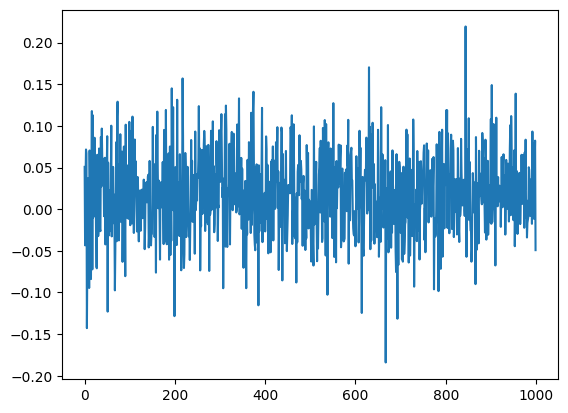

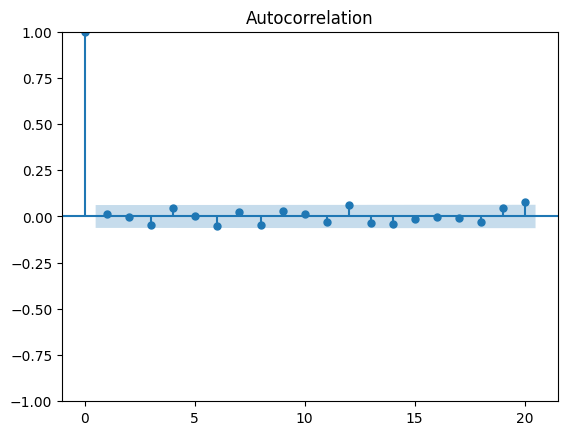

In [70]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Simulate white noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

Notice that for a white noise time series, all the autocorrelations are close to zero, so the past will not help you forecast the future.

# Random Walk

Whereas stock returns are often modeled as white noise, stock prices closely follow a random walk. In other words, today's price is yesterday's price plus some random noise.

- $P_t = P_{t-1} + \epsilon_t$
- change in price is white noise: $P_t - P_{t-1} = \epsilon_t$
- **can't forecast a random walk**
- best forecast for tomorrow's price is today's price
- random walk with drift: $P_t = \mu + P_{t-1} + \epsilon_t$
- change in price in white noise with non-zero mean: $P_t - P_{t-1} = \mu +  \epsilon_t$

Statistical Test for Random Walk:

method A:
- random walk with drift: $P_t = \mu + P_{t-1} + \epsilon_t$
- regression test for random walk: $P_t = \alpha + \beta P_{t-1} + \epsilon_{t}$
- Test:

$H_0: \beta = 1$ (random walk)

$H_1: \beta < 1$ (not random walk)

method B:
- regression test for random walk: $P_t = \alpha + \beta P_{t-1} + \epsilon_{t}$
- equivalent to

$P_t - P_{t-1} = \alpha + \beta P_{t-1} + \epsilon_{t}$
 
 - Test:

$H_0: \beta = 0$ (random walk)

$H_1: \beta < 0$ (not random walk)

- This test is called the Dickey-Fuller test
- If you add more lagged changes on the right hand side, it's the **Augmented Dickey-Fuller** test.

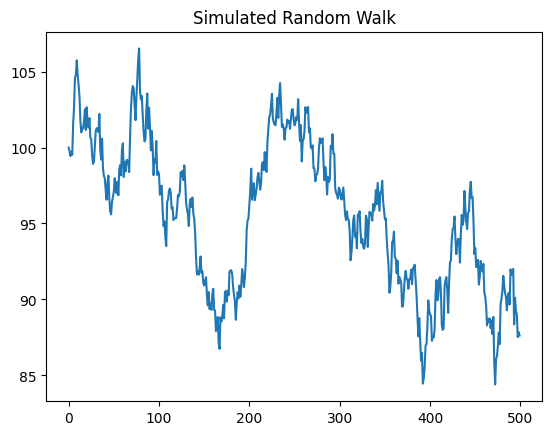

In [76]:
# generate a random walk

# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

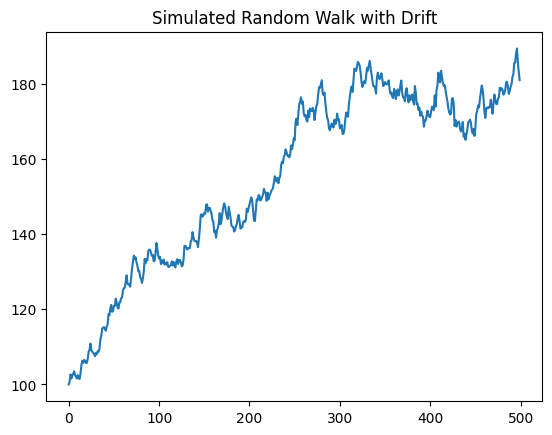

In [77]:
# Generate a drift

# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

This simulated price series you plotted should closely resemble a random walk for a high flying stock.

## Random Walk Statistical test:

Run the 'Augmented Dickey-Fuller Test'

In [78]:
AMZN=pd.read_csv('data/AMZN.csv', sep=',', index_col='Date')
AMZN.index=pd.to_datetime(AMZN.index)
AMZN.head()

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


In [79]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(AMZN)
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(4.025168525770738, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}, 30308.64216426981)
The p-value of the test on prices is: 1.0


According to this test, we cannot reject the hypothesis that Amazon prices follow a random walk. In the next exercise, you'll look at Amazon returns.

In [80]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret)
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 2.56558980834849e-22


The p-value is extremely small, so we can easily reject the hypothesis that returns are a random walk at all levels of significance.

# Stationary

What is Stationarity?

- strong stationarity: entire distribution of data is time-invariant
- weak stationarity: mean, variance and autocorrelation are time-invariant (i.e. for autocorrelation, corr($X_t, X_{t-τ}$) is only a function of $\tau$.

Why do we care?

- if parameters vary with time, too many parameters to estimate
- can only estimate a parsimonious model with a few parameters


You can transform Nonstationary Series into stationary series.

<Figure size 640x480 with 0 Axes>

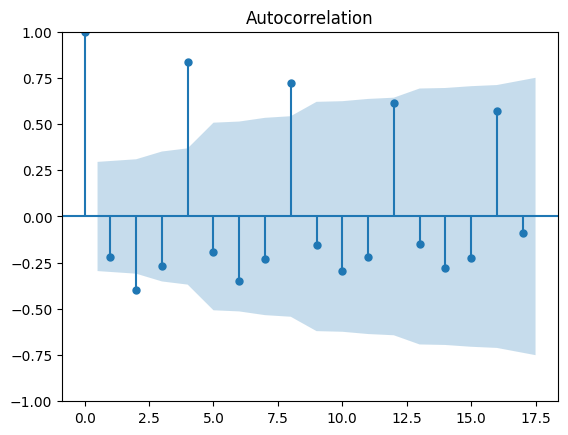

In [86]:
# original autocorrelation without adjusting the time series

# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
plt.clf()
plot_acf(HRB)
plt.show()

In [87]:
# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

            Earnings
quarter             
2007-01-01       NaN
2007-04-01       NaN
2007-07-01       NaN
2007-10-01       NaN
2008-01-01      0.02
2008-04-01     -0.04
2008-07-01     -0.05
2008-10-01      0.26
2009-01-01     -0.05
2009-04-01      0.02


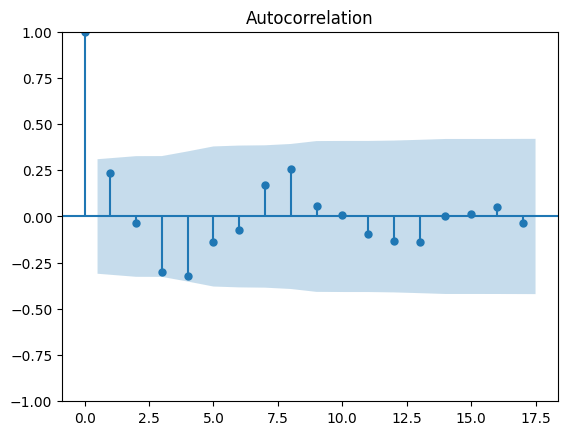

In [82]:
# Drop the NaN data in the first four rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()

By seasonally adjusting the series, we eliminated the seasonal pattern in the autocorrelation function.